## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id=combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data=combined_df.loc[combined_df["Mouse ID"]=='g989']
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combined_df[combined_df["Mouse ID"].isin(duplicate_id)==False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean

median=clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median

var=clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

std=clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

sem=clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_table_df=pd.DataFrame({"Mean": mean,
                           "Median": median,
                           "Variance": var,
                           "Standard Deviation": std,
                           "SEM": sem})
summary_table_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table_df=combined_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_table_df

# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

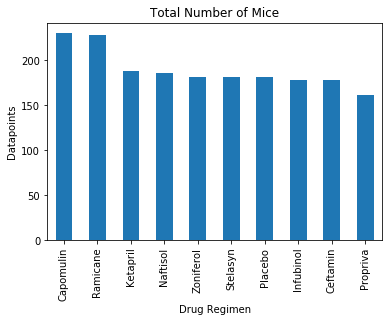

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count=combined_df["Drug Regimen"].value_counts()
count.plot(kind="bar")
plt.title("Total Number of Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Datapoints")
plt.show()

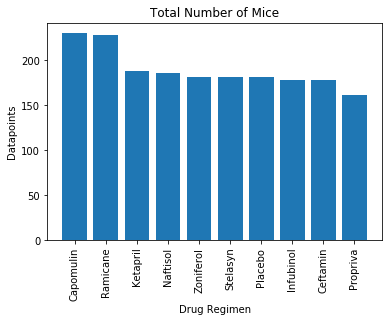

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(count.index.values, count.values)
plt.title("Total Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Datapoints")
plt.show()


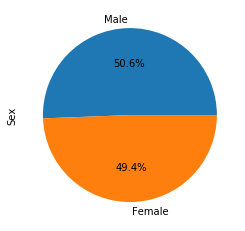

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gendercount=combined_df["Sex"].value_counts()
gendercount.plot(kind="pie", autopct='%1.1f%%')
plt.show()


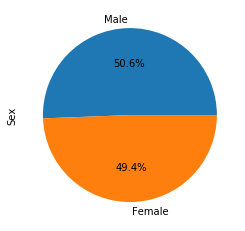

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gendercount.values, labels=gendercount.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
tumor_vol_max=combined_df.groupby(["Mouse ID"]).max()["Timepoint"]
tumor_vol_max=tumor_vol_max.reset_index()



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data=tumor_vol_max.merge(combined_df, on=["Mouse ID", "Timepoint"], how="left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor=merged_data.loc[merged_data["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_list.append(final_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


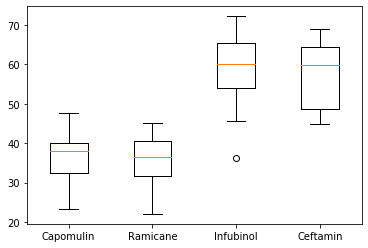

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels=drug_list)
plt.show()

## Line and Scatter Plots

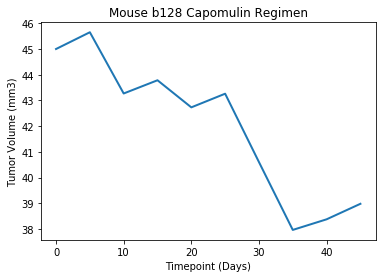

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_df=clean_data.loc[clean_data["Mouse ID"]== "b128",:]
mouse_df.head()

x_axis = mouse_df["Timepoint"]
y_axis = mouse_df["Tumor Volume (mm3)"]

plt.title('Mouse b128 Capomulin Regimen')
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()


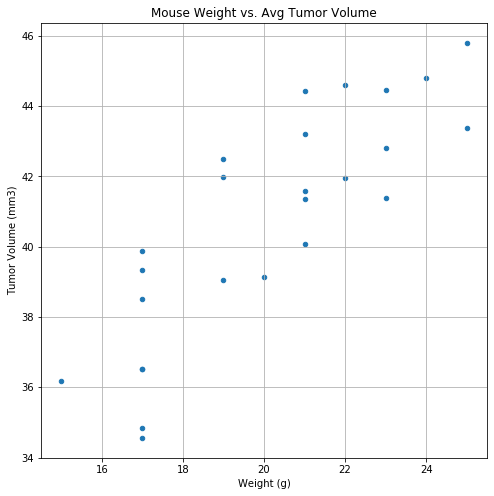

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
cap_df = cap_df.reset_index()

reduced_df = cap_df.loc[:,["Mouse ID" , "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

avg_tumor_vol = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_tumor_vol.head()

avg_tumor_vol=avg_tumor_vol.set_index("Mouse ID")

avg_tumor_vol.plot(kind="scatter", x="Weight (g)" , y="Tumor Volume (mm3)" , grid=True, figsize=(8,8), 
                 title="Mouse Weight vs. Avg Tumor Volume")

plt.show()
              
              

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = avg_tumor_vol.iloc[:,0]
avg_tumor = avg_tumor_vol.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")




The correlation between both factors is 0.84


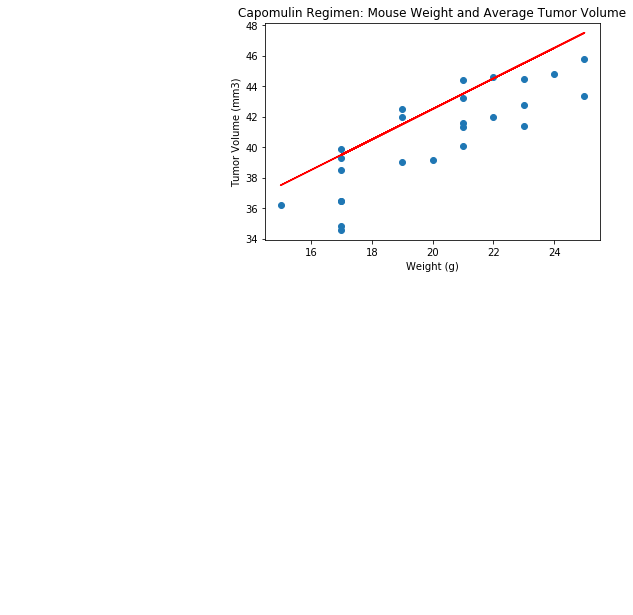

In [21]:
x_value=avg_tumor_vol["Weight (g)"]  
y_value=avg_tumor_vol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values=x_value + slope + intercept 
line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Regimen: Mouse Weight and Average Tumor Volume")
plt.show()